## Kaggle Intro to Deep Learning

In [1]:
import pandas as pd
import numpy as np

We use tensorflow to construct the neurons in the deep learning process

**Exercise 1**

In the tutorial we learned about the building blocks of neural networks: linear units. We saw that a model of just one linear unit will fit a linear function to a dataset (equivalent to linear regression). In this exercise, you'll build a linear model and get some practice working with models in Keras.

Before you get started, run the code cell below to set everything up.

In [2]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

The Red Wine Quality dataset consists of physiochemical measurements from about 1600 Portuguese red wines. Also included is a quality rating for each wine from blind taste-tests.

First, run the next cell to display the first few rows of this dataset.

In [3]:
red_wine = pd.read_csv('data/winequality-red.csv')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
red_wine.shape # (rows, columns)

(1599, 12)

1) Input shape: 

How well can we predict a wine's perceived quality from the physiochemical measurements?

The target is 'quality', and the remaining columns are the features. How would you set the input_shape parameter for a Keras model on this task?

In [5]:
input_shape=[11]

2) Define a linear model

Now define a linear model appropriate for this task. Pay attention to how many inputs and outputs the model should have.

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([layers.Dense(units=1, input_shape=[11])])


In [7]:
w, b = model.weights

print("Weights\n{}\n\nBias\n{}".format(w, b))

Weights
<tf.Variable 'dense/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[-0.07507211],
       [-0.39324376],
       [-0.39241362],
       [-0.02720261],
       [-0.494174  ],
       [-0.5634821 ],
       [-0.5893785 ],
       [-0.32378793],
       [-0.15220273],
       [-0.32212296],
       [-0.5639132 ]], dtype=float32)>

Bias
<tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


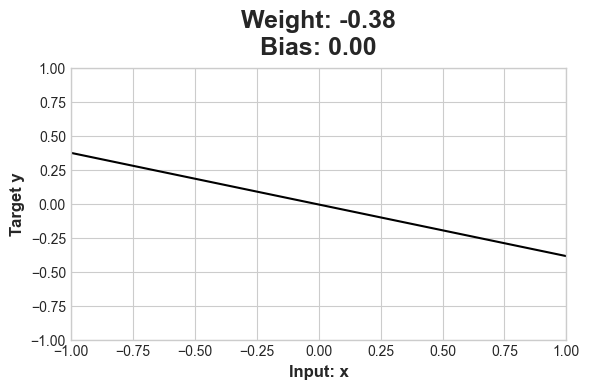

In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt

model = keras.Sequential([
    layers.Dense(1, input_shape=[1]),
])

x = tf.linspace(-1.0, 1.0, 100)
y = model.predict(x)

plt.figure(dpi=100)
plt.plot(x, y, 'k')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("Input: x")
plt.ylabel("Target y")
w, b = model.weights # you could also use model.get_weights() here
plt.title("Weight: {:0.2f}\nBias: {:0.2f}".format(w[0][0], b[0]))
plt.show()

**Deep Neural Networks**

Layers

Neural networks typically organize their neurons into layers. When we collect together linear units having a common set of inputs we get a dense layer.

The Activation Function

An activation function is simply some function we apply to each of a layer's outputs (its activations). The most common is the rectifier function. 

The rectifier function has a graph that's a line with the negative part "rectified" to zero. Applying the function to the outputs of a neuron will put a bend in the data, moving us away from simple lines.

When we attach the rectifier to a linear unit, we get a rectified linear unit or ReLU. (For this reason, it's common to call the rectifier function the "ReLU function".) Applying a ReLU activation to a linear unit means the output becomes max(0, w * x + b), which we might draw in a diagram like

Building Sequential Models

The Sequential model we've been using will connect together a list of layers in order from first to last: the first layer gets the input, the last layer produces the output. This creates the model in the figure above:

In [9]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units=4, activation='relu', input_shape=[2]),
    layers.Dense(units=3, activation='relu'),
    # the linear output layer 
    layers.Dense(units=1),
])

Be sure to pass all the layers together in a list, like [layer, layer, layer, ...], instead of as separate arguments. To add an activation function to a layer, just give its name in the activation argument.

**Exercise 1: Deep Neural Networks**

In [10]:
# Setup plotting
import tensorflow as tf
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)

In [11]:
concrete = pd.read_csv('data/Concrete_Data.csv')
concrete.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,CompressiveStrength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


1) Input Shape

The target for this task is the column `CompressiveStrength` . The remaining columns are the features we'll use as inputs.

What would be the input shape for this dataset

In [12]:
concrete.shape

(1030, 9)

In [13]:
# YOUR CODE HERE
input_shape = [8]

2) Define a Model with Hidden Layers #

Now create a model with three hidden layers, each having 512 units and the ReLU activation.  Be sure to include an output layer of one unit and no activation, and also `input_shape` as an argument to the first layer.

In [14]:
from tensorflow import keras
from tensorflow.keras import layers


model = keras.Sequential([
    layers.Dense(units=512, activation='relu', input_shape=[8]), 
    layers.Dense(units=512,activation='relu'),
    layers.Dense(units=512, activation='relu'),
    layers.Dense(units=1)
])

3) Activation Layers
Let's explore activations functions some.

The usual way of attaching an activation function to a `Dense` layer is to include it as part of the definition with the `activation` argument. Sometimes though you'll want to put some other layer between the Dense layer and its activation function. (We'll see an example of this in Lesson 5 with batch normalization.) In this case, we can define the activation in its own Activation layer, like so:

`layers.Dense(units=8),`
`layers.Activation('relu')`

This is completely equivalent to the ordinary way: `layers.Dense(units=8, activation='relu')`.

Rewrite the following model so that each activation is in its own `Activation` layer.

In [15]:
### YOUR CODE HERE: rewrite this to use activation layers
model = keras.Sequential([
    layers.Dense(32, input_shape=[8]),
    layers.Activation('relu'), 
    layers.Dense(32),
    layers.Activation('relu'), 
    layers.Dense(1),
])


Optional: Alternatives to ReLU #

There is a whole family of variants of the `'relu'` activation -- `'elu'`, `'selu'`, and `'swish'`, among others -- all of which you can use in Keras. Sometimes one activation will perform better than another on a given task, so you could consider experimenting with activations as you develop a model. The ReLU activation tends to do well on most problems, so it's a good one to start with.

Let's look at the graphs of some of these. Change the activation from `'relu'` to one of the others named above. Then run the cell to see the graph. (Check out the [documentation](https://www.tensorflow.org/api_docs/python/tf/keras/activations) for more ideas.)

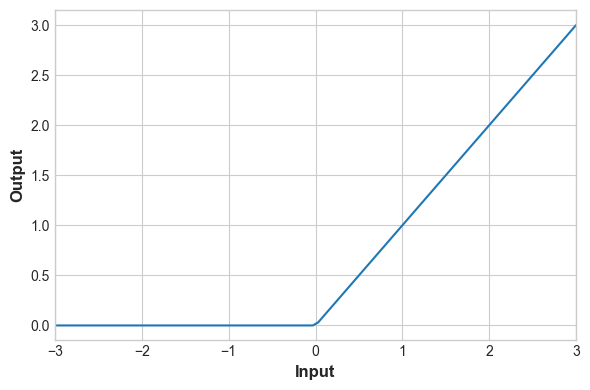

In [16]:
# YOUR CODE HERE: Change 'relu' to 'elu', 'selu', 'swish'... or something else
activation_layer = layers.Activation('relu')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

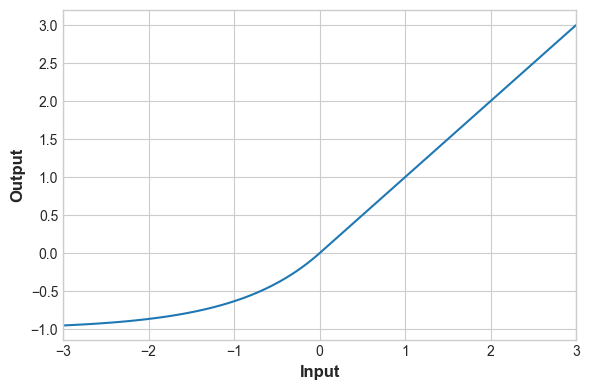

In [17]:
# YOUR CODE HERE: Change 'relu' to 'elu', 'selu', 'swish'... or something else
activation_layer = layers.Activation('elu')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

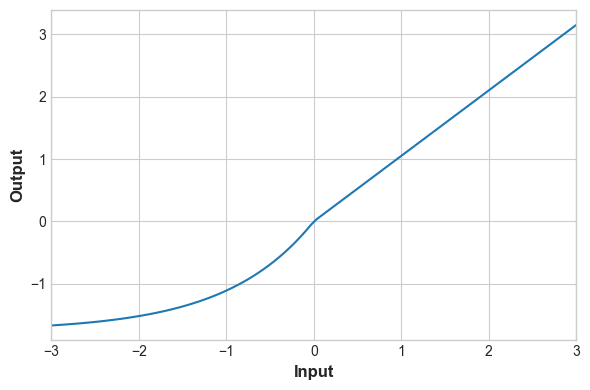

In [18]:
# YOUR CODE HERE: Change 'relu' to 'elu', 'selu', 'swish'... or something else
activation_layer = layers.Activation('selu')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

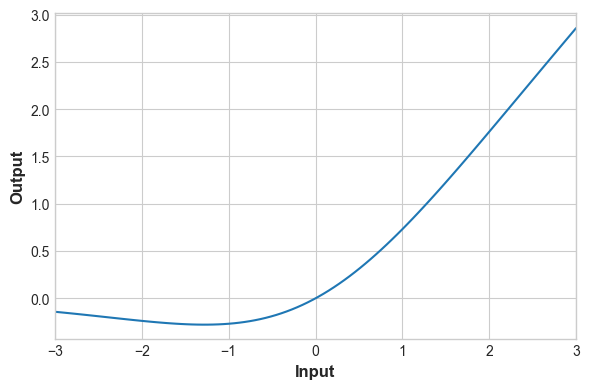

In [19]:
# YOUR CODE HERE: Change 'relu' to 'elu', 'selu', 'swish'... or something else
activation_layer = layers.Activation('swish')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

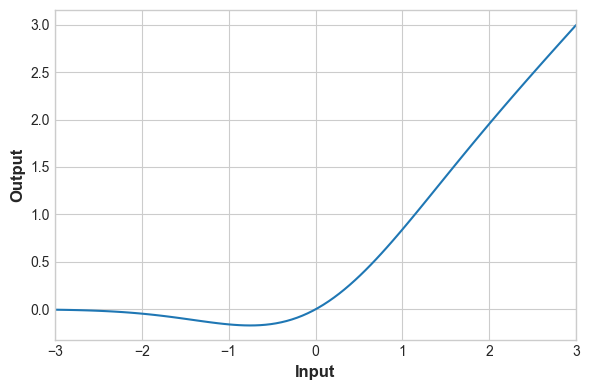

In [20]:
# YOUR CODE HERE: Change 'relu' to 'elu', 'selu', 'swish'... or something else
activation_layer = layers.Activation('gelu')

x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) # once created, a layer is callable just like a function

plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

**Stochastic Gradient Descent**

In addition to the training data, we need two more things:

A "loss function" that measures how good the network's predictions are.
An "optimizer" that can tell the network how to change its weights.

We've seen how to design an architecture for a network, but we haven't seen how to tell a network what problem to solve. This is the job of the loss function.

The loss function measures the disparity between the the target's true value and the value the model predicts.

Different problems call for different loss functions. We have been looking at regression problems, where the task is to predict some numerical value -- calories in 80 Cereals, rating in Red Wine Quality. Other regression tasks might be predicting the price of a house or the fuel efficiency of a car.

A common loss function for regression problems is the mean absolute error or MAE. For each prediction `y_pred`, MAE measures the disparity from the true target `y_true` by an absolute difference `abs(y_true - y_pred)`.

Besides MAE, other loss functions you might see for regression problems are the mean-squared error (MSE) or the Huber loss (both available in Keras).

During training, the model will use the loss function as a guide for finding the correct values of its weights (lower loss is better). In other words, the loss function tells the network its objective.

The Optimizer - Stochastic Gradient Descent

We've described the problem we want the network to solve, but now we need to say how to solve it. This is the job of the optimizer. The optimizer is an algorithm that adjusts the weights to minimize the loss.

Virtually all of the optimization algorithms used in deep learning belong to a family called stochastic gradient descent. They are iterative algorithms that train a network in steps. One step of training goes like this:

Sample some training data and run it through the network to make predictions.
Measure the loss between the predictions and the true values.
Finally, adjust the weights in a direction that makes the loss smaller.
Then just do this over and over until the loss is as small as you like (or until it won't decrease any further.)

Each iteration's sample of training data is called a minibatch (or often just "batch"), while a complete round of the training data is called an epoch. The number of epochs you train for is how many times the network will see each training example.

The animation shows the linear model from Lesson 1 being trained with SGD. The pale red dots depict the entire training set, while the solid red dots are the minibatches. Every time SGD sees a new minibatch, it will shift the weights (w the slope and b the y-intercept) toward their correct values on that batch. Batch after batch, the line eventually converges to its best fit. You can see that the loss gets smaller as the weights get closer to their true values.

Learning Rate and Batch Size

Notice that the line only makes a small shift in the direction of each batch (instead of moving all the way). The size of these shifts is determined by the learning rate. A smaller learning rate means the network needs to see more minibatches before its weights converge to their best values.

The learning rate and the size of the minibatches are the two parameters that have the largest effect on how the SGD training proceeds. Their interaction is often subtle and the right choice for these parameters isn't always obvious. (We'll explore these effects in the exercise.)

Fortunately, for most work it won't be necessary to do an extensive hyperparameter search to get satisfactory results. Adam is an SGD algorithm that has an adaptive learning rate that makes it suitable for most problems without any parameter tuning (it is "self tuning", in a sense). Adam is a great general-purpose optimizer.

Adding the Loss and Optimizer

After defining a model, you can add a loss function and optimizer with the model's compile method:

`model.compile(
    optimizer="adam",
    loss="mae",
)`

Notice that we are able to specify the loss and optimizer with just a string. You can also access these directly through the Keras API -- if you wanted to tune parameters, for instance -- but for us, the defaults will work fine.

What's In a Name?
`The gradient is a vector that tells us in what direction the weights need to go. More precisely, it tells us how to change the weights to make the loss change fastest. We call our process gradient descent because it uses the gradient to descend the loss curve towards a minimum. Stochastic means "determined by chance." Our training is stochastic because the minibatches are random samples from the dataset. And that's why it's called SGD!`

Example

Now we know everything we need to start training deep learning models. So let's see it in action! We'll use the Red Wine Quality dataset.

This dataset consists of physiochemical measurements from about 1600 Portuguese red wines. Also included is a quality rating for each wine from blind taste-tests. How well can we predict a wine's perceived quality from these measurements?

We've put all of the data preparation into this next hidden cell. It's not essential to what follows so feel free to skip it. One thing you might note for now though is that we've rescaled each feature to lie in the interval  0=1. As we'll discuss more in Lesson 5, neural networks tend to perform best when their inputs are on a common scale.

In [21]:
from IPython.display import display

red_wine = pd.read_csv('data/winequality-red.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


How many inputs should this network have? We can discover this by looking at the number of columns in the data matrix. Be sure not to include the target ('quality') here -- only the input features.

In [22]:
X_train.shape

(1119, 11)

Eleven columns means eleven inputs.

We've chosen a three-layer network with over 1500 neurons. This network should be capable of learning fairly complex relationships in the data.

In [23]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

Deciding the architecture of your model should be part of a process. Start simple and use the validation loss as your guide. You'll learn more about model development in the exercises.

After defining the model, we compile in the optimizer and loss function.

In [24]:
model.compile(optimizer='adam', loss='mae')

Now we're ready to start the training! We've told Keras to feed the optimizer 256 rows of the training data at a time (the `batch_size`) and to do that 10 times all the way through the dataset (the `epochs`)

In [25]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 [==============================] - 3s 65ms/step - loss: 0.2786 - val_loss: 0.1321
Epoch 2/10
5/5 [==============================] - 0s 20ms/step - loss: 0.1334 - val_loss: 0.1195
Epoch 3/10
5/5 [==============================] - 0s 46ms/step - loss: 0.1173 - val_loss: 0.1176
Epoch 4/10
5/5 [==============================] - 0s 21ms/step - loss: 0.1114 - val_loss: 0.1057
Epoch 5/10
5/5 [==============================] - 0s 20ms/step - loss: 0.1074 - val_loss: 0.1039
Epoch 6/10
5/5 [==============================] - 0s 21ms/step - loss: 0.1045 - val_loss: 0.1030
Epoch 7/10
5/5 [==============================] - 0s 20ms/step - loss: 0.1032 - val_loss: 0.1019
Epoch 8/10
5/5 [==============================] - 0s 20ms/step - loss: 0.1024 - val_loss: 0.1018
Epoch 9/10
5/5 [==============================] - 0s 21ms/step - loss: 0.1022 - val_loss: 0.1051
Epoch 10/10
5/5 [==============================] - 0s 21ms/step - loss: 0.0991 - val_loss: 0.1030


You can see that Keras will keep you updated on the loss as the model trains.

Often, a better way to view the loss though is to plot it. The fit method in fact keeps a record of the loss produced during training in a History object. We'll convert the data to a Pandas dataframe, which makes the plotting easy.

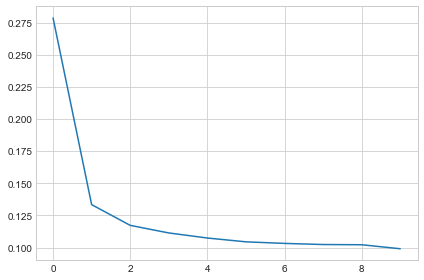

In [26]:
# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();

**Exercise: Stochastic Gradient Descent**

In the Fuel Economy dataset your task is to predict the fuel economy of an automobile given features like its type of engine or the year it was made.

First load the dataset by running the cell below.

In [27]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

fuel = pd.read_csv('data/fuel.csv')

X = fuel.copy()
# Remove target
y = X.pop('FE')

preprocessor = make_column_transformer(
    (StandardScaler(),
     make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(sparse=False),
     make_column_selector(dtype_include=object)),
)

X = preprocessor.fit_transform(X)
y = np.log(y) # log transform target instead of standardizing

input_shape = [X.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [50]


In [28]:
# Uncomment to see original data
fuel.head()
# Uncomment to see processed features
pd.DataFrame(X[:10,:]).head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.913643,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.530594,1.068005,0.524148,0.685653,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.296693,2.120794,0.524148,-1.458464,-0.226455,0.391659,0.43492,0.463841,-0.447941,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Run the next cell to define the network we'll use for this task.

In [29]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(128, activation='relu'),    
    layers.Dense(64, activation='relu'),
    layers.Dense(1),
])

Before training the network we need to define the loss and optimizer we'll use. Using the model's compile method, add the Adam optimizer and MAE loss.

In [30]:
model.compile(
    optimizer="adam",
    loss="mae",
)

2) Train Model

Once you've defined the model and compiled it with a loss and optimizer you're ready for training. Train the network for 200 epochs with a batch size of 128. The input data is X with target y.


In [31]:
history = model.fit(
    X, y,
    #validation_data=(X_valid, y_valid),
    batch_size=128,
    epochs=200,
)

Epoch 1/200
9/9 [==============================] - 1s 3ms/step - loss: 3.1404
Epoch 2/200
9/9 [==============================] - 0s 4ms/step - loss: 1.5069
Epoch 3/200
9/9 [==============================] - 0s 2ms/step - loss: 0.7094
Epoch 4/200
9/9 [==============================] - 0s 5ms/step - loss: 0.4328
Epoch 5/200
9/9 [==============================] - 0s 3ms/step - loss: 0.3109
Epoch 6/200
9/9 [==============================] - 0s 3ms/step - loss: 0.2194
Epoch 7/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1704
Epoch 8/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1427
Epoch 9/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1133
Epoch 10/200
9/9 [==============================] - 0s 2ms/step - loss: 0.1037
Epoch 11/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0898
Epoch 12/200
9/9 [==============================] - ETA: 0s - loss: 0.079 - 0s 4ms/step - loss: 0.0817
Epoch 13/200
9/9 [===================

9/9 [==============================] - 0s 2ms/step - loss: 0.0324
Epoch 105/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0321
Epoch 106/200
9/9 [==============================] - 0s 4ms/step - loss: 0.0308
Epoch 107/200
9/9 [==============================] - 0s 2ms/step - loss: 0.0344
Epoch 108/200
9/9 [==============================] - 0s 1ms/step - loss: 0.0336
Epoch 109/200
9/9 [==============================] - 0s 3ms/step - loss: 0.0370
Epoch 110/200
9/9 [==============================] - 0s 3ms/step - loss: 0.0408
Epoch 111/200
9/9 [==============================] - 0s 4ms/step - loss: 0.0325
Epoch 112/200
9/9 [==============================] - 0s 4ms/step - loss: 0.0301
Epoch 113/200
9/9 [==============================] - 0s 3ms/step - loss: 0.0337
Epoch 114/200
9/9 [==============================] - 0s 4ms/step - loss: 0.0323
Epoch 115/200
9/9 [==============================] - 0s 4ms/step - loss: 0.0312
Epoch 116/200
9/9 [==============================] - 0

The last step is to look at the loss curves and evaluate the training. Run the cell below to get a plot of the training loss.

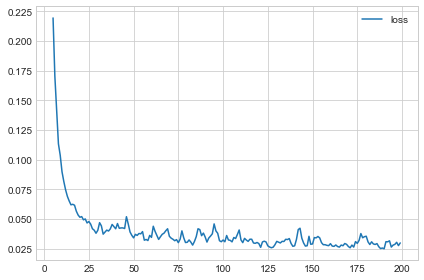

In [32]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5. You can change this to get a different view.
history_df.loc[5:, ['loss']].plot();

In [33]:
history_df 

,loss
0,3.140435
1,1.506913
2,0.709357
3,0.432756
4,0.310868
...,...
195,0.028037
196,0.028667
197,0.030406
198,0.027637


3) Evaluate Training

If you trained the model longer, would you expect the loss to decrease further?

With the learning rate and the batch size, you have some control over:
- How long it takes to train a model
- How noisy the learning curves are
- How small the loss becomes

To get a better understanding of these two parameters, we'll look at the linear model, our ppsimplest neural network. Having only a single weight and a bias, it's easier to see what effect a change of parameter has.

The next cell will generate an animation like the one in the tutorial. Change the values for `learning_rate`, `batch_size`, and `num_examples` (how many data points) and then run the cell. (It may take a moment or two.) Try the following combinations, or try some of your own:

| `learning_rate` | `batch_size` | `num_examples` |
|-----------------|--------------|----------------|
| 0.05            | 32           | 256            |
| 0.05            | 2            | 256            |
| 0.05            | 128          | 256            |
| 0.02            | 32           | 256            |
| 0.2             | 32           | 256            |
| 1.0             | 32           | 256            |
| 0.9             | 4096         | 8192           |
| 0.99            | 4096         | 8192           |

In [34]:
# YOUR CODE HERE: Experiment with different values for the learning rate, batch size, and number of examples
from learntools.deep_learning_intro.dltools import animate_sgd

learning_rate = 0.05
batch_size = 32
num_examples = 256

animate_sgd(
    learning_rate=learning_rate,
    batch_size=batch_size,
    num_examples=num_examples,
    # You can also change these, if you like
    steps=50, # total training steps (batches seen)
    true_w=3.0, # the slope of the data
    true_b=2.0, # the bias of the data
)

ModuleNotFoundError: No module named 'learntools'

**Overfitting and Underfitting**

This trade-off indicates that there can be two problems that occur when training a model: not enough signal or too much noise. `Underfitting` the training set is when the loss is not as low as it could be because the model hasn't learned enough signal. `Overfitting`the training set is when the loss is not as low as it could be because the model learned too much noise. The trick to training deep learning models is finding the best balance between the two.

We'll look at a couple ways of getting more signal out of the training data while reducing the amount of noise.

A model's `capacity` refers to the size and complexity of the patterns it is able to learn. For neural networks, this will largely be determined by how many neurons it has and how they are connected together. If it appears that your network is underfitting the data, you should try increasing its capacity.

You can increase the capacity of a network either by making it wider (more units to existing layers) or by making it deeper (adding more layers). Wider networks have an easier time learning more linear relationships, while deeper networks prefer more nonlinear ones. Which is better just depends on the dataset.

We mentioned that when a model is too eagerly learning noise, the validation loss may start to increase during training. To prevent this, we can simply stop the training whenever it seems the validation loss isn't decreasing anymore. Interrupting the training this way is called `early stopping`.

In Keras, we include early stopping in our training through a `callback`. A callback is just a function you want run every so often while the network trains. The early stopping callback will run after every epoch. (Keras has a variety of useful callbacks pre-defined, but you can define your own, too.)

These parameters say: "If there hasn't been at least an improvement of 0.001 in the validation loss over the previous 20 epochs, then stop the training and keep the best model you found." It can sometimes be hard to tell if the validation loss is rising due to overfitting or just due to random batch variation. The parameters allow us to set some allowances around when to stop.

As we'll see in our example, we'll pass this callback to the fit method along with the loss and optimizer.

Example - Train a Model with Early Stopping:

In [ ]:
red_wine = pd.read_csv('data/winequality-red.csv')
red_wine.head()

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid= red_wine.drop(df_train.index)

# Scale to [0, 1]
max_=df_train.max(axis=0)
min_=df_train.min(axis=0)
df_train=(df_train-min_)/(max_-min_)
df_valid=(df_valid-min_)/(max_-min_)


# Split features and target
X_train=df_train.drop('quality',axis=1)
X_valid=df_valid.drop('quality',axis=1)
y_train=df_train['quality']
y_valid=df_valid['quality']
display(df_train.head(4))

Now let's increase the capacity of the network. We'll go for a fairly large network, but rely on the callback to halt the training once the validation loss shows signs of increasing.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers, callbacks

#Building the model

#early stopping callback
early_stopping=callbacks.EarlyStopping(
    min_delta=0.001,# minimium amount of change to count as an improvement
    patience=20, #how many epochs to wait before stopping
    restore_best_weights=True,
)

# Seq model
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])


# Optimizers
model.compile(
    optimizer='adam',
    loss='mae'
)

In [ ]:
#fitting the model to the dataset

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=500,
    callbacks=[early_stopping], # put your callbacks in a list
    verbose=0,  # turn off training log
)

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();
print("Minimum validation loss: {}".format(history_df['val_loss'].min()))

**Exercise: Overfitting and Underfitting**

**Dont run the codes for the following dataset, as it missing**

In [9]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

spotify = pd.read_csv('data/spotify.csv')

X = spotify.copy().dropna()
y = X.pop('track_popularity')
artists = X['track_artist']

features_num = ['danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo', 'duration_ms']
features_cat = ['playlist_genre']

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat),
)

# We'll do a "grouped" split to keep all of an artist's songs in one
# split or the other. This is to help prevent signal leakage.
def group_split(X, y, group, train_size=0.75):
    splitter = GroupShuffleSplit(train_size=train_size)
    train, test = next(splitter.split(X, y, groups=group))
    return (X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test])

X_train, X_valid, y_train, y_valid = group_split(X, y, artists)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
y_train = y_train / 100 # popularity is on a scale 0-100, so this rescales to 0-1.
y_valid = y_valid / 100

input_shape = [X_train.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [18]


Let's start with the simplest network, a linear model. This model has low capacity.

Run this next cell without any changes to train a linear model on the Spotify dataset.

Minimum Validation Loss: 0.1943


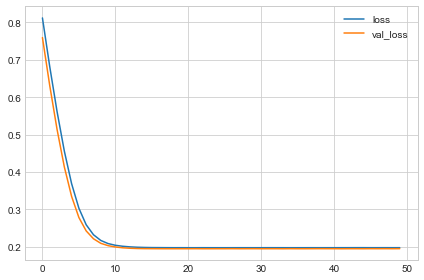

In [10]:
model = keras.Sequential([
    layers.Dense(1, input_shape=input_shape),
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    verbose=0, # suppress output since we'll plot the curves
)
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

UNDERFIT

Now let's add some capacity to our network. We'll add three hidden layers with 128 units each. Run the next cell to train the network and see the learning curves.

Epoch 1/50
49/49 [==============================] - 1s 6ms/step - loss: 0.2288 - val_loss: 0.2049
Epoch 2/50
49/49 [==============================] - 0s 4ms/step - loss: 0.2019 - val_loss: 0.2004
Epoch 3/50
49/49 [==============================] - 0s 3ms/step - loss: 0.1962 - val_loss: 0.2001
Epoch 4/50
49/49 [==============================] - 0s 5ms/step - loss: 0.1931 - val_loss: 0.1982
Epoch 5/50
49/49 [==============================] - 0s 3ms/step - loss: 0.1916 - val_loss: 0.1984
Epoch 6/50
49/49 [==============================] - 0s 3ms/step - loss: 0.1897 - val_loss: 0.1975
Epoch 7/50
49/49 [==============================] - 0s 3ms/step - loss: 0.1883 - val_loss: 0.1969
Epoch 8/50
49/49 [==============================] - 0s 3ms/step - loss: 0.1873 - val_loss: 0.1968
Epoch 9/50
49/49 [==============================] - 0s 3ms/step - loss: 0.1861 - val_loss: 0.1965
Epoch 10/50
49/49 [==============================] - 0s 3ms/step - loss: 0.1848 - val_loss: 0.1962
Epoch 11/50
49/49 [

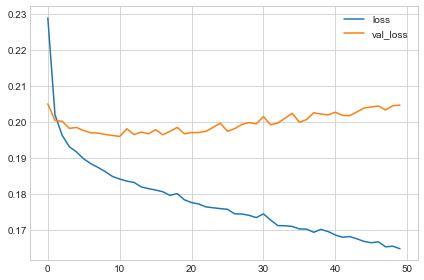

In [11]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

OVERFIT

3) Define Early Stopping Callback

Now define an early stopping callback that waits 5 epochs (`patience`) for a change in validation loss of at least `0.001` (`min_delta`) and keeps the weights with the best loss (`restore_best_weights`).

In [12]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=5,
    restore_best_weights=True
)


Now run this cell to train the model and get the learning curves. Notice the callbacks argument in model.fit.

Epoch 1/50
49/49 [==============================] - 1s 7ms/step - loss: 0.2194 - val_loss: 0.2039
Epoch 2/50
49/49 [==============================] - 0s 4ms/step - loss: 0.2002 - val_loss: 0.1984
Epoch 3/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1955 - val_loss: 0.1967
Epoch 4/50
49/49 [==============================] - 0s 3ms/step - loss: 0.1929 - val_loss: 0.1956
Epoch 5/50
49/49 [==============================] - 0s 3ms/step - loss: 0.1908 - val_loss: 0.1947
Epoch 6/50
49/49 [==============================] - 0s 3ms/step - loss: 0.1896 - val_loss: 0.1950
Epoch 7/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1888 - val_loss: 0.1945
Epoch 8/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1871 - val_loss: 0.1947
Epoch 9/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1864 - val_loss: 0.1953
Epoch 10/50
49/49 [==============================] - 0s 4ms/step - loss: 0.1856 - val_loss: 0.1943
Epoch 11/50
49/49 [

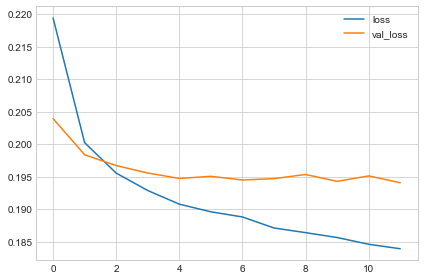

In [13]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),    
    layers.Dense(1)
])
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    callbacks=[early_stopping]
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

The early stopping callback did stop the training once the network began overfitting. Moreover, by including restore_best_weights we still get to keep the model where validation loss was lowest.

**Dropout and Batch Normalization**

In the last lesson we talked about how overfitting is caused by the network learning spurious patterns in the training data. To recognize these spurious patterns a network will often rely on very a specific combinations of weight, a kind of "conspiracy" of weights. Being so specific, they tend to be fragile: remove one and the conspiracy falls apart.

This is the idea behind `dropout`. To break up these conspiracies, we randomly drop out some fraction of a layer's input units every step of training, making it much harder for the network to learn those spurious patterns in the training data. Instead, it has to search for broad, general patterns, whose weight patterns tend to be more robust.

In [ ]:
'''keras.Sequential([
    # ...
    layers.Dropout(rate=0.3), # apply 30% dropout to the next layer
    layers.Dense(16),
    # ...
])
'''

The next special layer we'll look at performs `"batch normalization"` (or "batchnorm"), which can help correct training that is slow or unstable.

With neural networks, it's generally a good idea to put all of your data on a common scale, perhaps with something like scikit-learn's StandardScaler or MinMaxScaler. The reason is that SGD will shift the network weights in proportion to how large an activation the data produces. Features that tend to produce activations of very different sizes can make for unstable training behavior.

Now, if it's good to normalize the data before it goes into the network, maybe also normalizing inside the network would be better! In fact, we have a special kind of layer that can do this, the batch normalization layer. A batch normalization layer looks at each batch as it comes in, first normalizing the batch with its own mean and standard deviation, and then also putting the data on a new scale with two trainable rescaling parameters. Batchnorm, in effect, performs a kind of coordinated rescaling of its inputs.

Most often, batchnorm is added as an aid to the optimization process (though it can sometimes also help prediction performance). Models with batchnorm tend to need fewer epochs to complete training. Moreover, batchnorm can also fix various problems that can cause the training to get "stuck". Consider adding batch normalization to your models, especially if you're having trouble during training.

In [14]:
#It seems that batch normalization can be used at almost any point in a network. You can put it after a layer...

layers.Dense(16, activation='relu'),
layers.BatchNormalization(),
#... or between a layer and its activation function:

layers.Dense(16),
layers.BatchNormalization(),
layers.Activation('relu'),

(<tensorflow.python.keras.layers.core.Activation at 0x165c22232b0>,)

Example - `Using Dropout` and `Batch Normalization`

Let's continue developing the Red Wine model. Now we'll increase the capacity even more, but add dropout to control overfitting and batch normalization to speed up optimization. This time, we'll also leave off standardizing the data, to demonstrate how batch normalization can stabalize the training.

In [15]:
red_wine = pd.read_csv('data/winequality-red.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

In [16]:
# Applying the drop out and batch normalization
model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

There's nothing to change this time in how we set up the training.

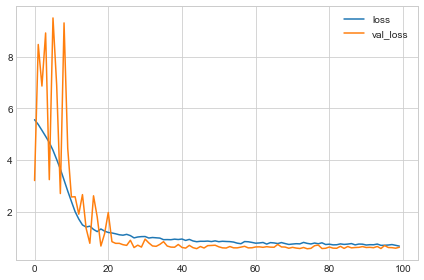

In [17]:
model.compile(
    optimizer='adam',
    loss='mae'
)

#fitting the model

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=100,
    verbose=0,
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();

You'll typically get better performance if you standardize your data before using it for training. That we were able to use the raw data at all, however, shows how effective batch normalization can be on more difficult datasets.

**Exercise: Dropout and Batch Normalization**

In [18]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GroupShuffleSplit

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks

spotify = pd.read_csv('data/spotify.csv')

X = spotify.copy().dropna()
y = X.pop('track_popularity')
artists = X['track_artist']

features_num = ['danceability', 'energy', 'key', 'loudness', 'mode',
                'speechiness', 'acousticness', 'instrumentalness',
                'liveness', 'valence', 'tempo', 'duration_ms']
features_cat = ['playlist_genre']

preprocessor = make_column_transformer(
    (StandardScaler(), features_num),
    (OneHotEncoder(), features_cat),
)

def group_split(X, y, group, train_size=0.75):
    splitter = GroupShuffleSplit(train_size=train_size)
    train, test = next(splitter.split(X, y, groups=group))
    return (X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test])

X_train, X_valid, y_train, y_valid = group_split(X, y, artists)

X_train = preprocessor.fit_transform(X_train)
X_valid = preprocessor.transform(X_valid)
y_train = y_train / 100
y_valid = y_valid / 100

input_shape = [X_train.shape[1]]
print("Input shape: {}".format(input_shape))

Input shape: [18]


,track_id,track_name,track_artist,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


Addind Dropout 

In [20]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1)
])

Now run this next cell to train the model see the effect of adding dropout.


Minimum Validation Loss: 0.1921


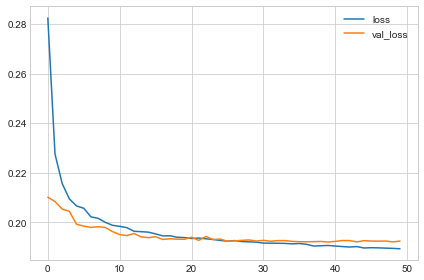

In [21]:
model.compile(
    optimizer='adam',
    loss='mae',
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=50,
    verbose=0,
)
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()))


Correct:

From the learning curves, you can see that the validation loss remains near a constant minimum even though the training loss continues to decrease. So we can see that adding dropout did prevent overfitting this time. Moreover, by making it harder for the network to fit spurious patterns, dropout may have encouraged the network to seek out more of the true patterns, possibly improving the validation loss some as well).

Now, we'll switch topics to explore how batch normalization can fix problems in training.

Load the Concrete dataset. We won't do any standardization this time. This will make the effect of batch normalization much more apparent.

In [23]:
import pandas as pd

concrete = pd.read_csv('data/Concrete_Data.csv')
df = concrete.copy()

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

X_train = df_train.drop('CompressiveStrength', axis=1)
X_valid = df_valid.drop('CompressiveStrength', axis=1)
y_train = df_train['CompressiveStrength']
y_valid = df_valid['CompressiveStrength']

input_shape = [X_train.shape[1]]

Run the following cell to train the network on the unstandardized *Concrete* data.

Minimum Validation Loss: nan


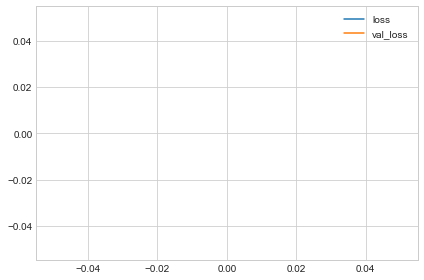

In [25]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=input_shape),
    layers.Dense(512, activation='relu'),    
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])
model.compile(
    optimizer='sgd', # SGD is more sensitive to differences of scale
    loss='mae',
    metrics=['mae'],
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=64,
    epochs=100,
    verbose=0,
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

Did you end up with a blank graph? Trying to train this network on this dataset will usually fail. Even when it does converge (due to a lucky weight initialization), it tends to converge to a very large number.

3) Add Batch Normalization Layers
Batch normalization can help correct problems like this.

Add four `BatchNormalization layers`, one before each of the dense layers. (Remember to move the input_shape argument to the new first layer.)

In [29]:
model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(512, activation='relu', input_shape=input_shape),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(), 
    layers.Dense(1),
])


Minimum Validation Loss: 3.9833


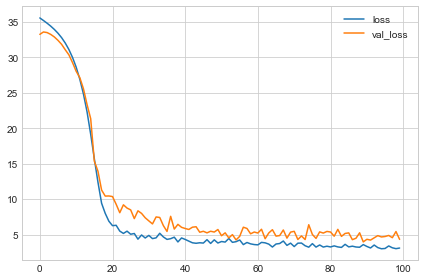

In [30]:
model.compile(
    optimizer='sgd',
    loss='mae',
    metrics=['mae'],
)
EPOCHS = 100
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=64,
    epochs=EPOCHS,
    verbose=0,
)

history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
print(("Minimum Validation Loss: {:0.4f}").format(history_df['val_loss'].min()))

Correct:

You can see that adding batch normalization was a big improvement on the first attempt! By adaptively scaling the data as it passes through the network, batch normalization can let you train models on difficult datasets.

**Binary Classification**

Introduction

So far in this course, we've learned about how neural networks can solve regression problems. Now we're going to apply neural networks to another common machine learning problem: classification. Most everything we've learned up until now still applies. The main difference is in the loss function we use and in what kind of outputs we want the final layer to produce.

Binary Classification

Classification into one of two classes is a common machine learning problem. You might want to predict whether or not a customer is likely to make a purchase, whether or not a credit card transaction was fraudulent, whether deep space signals show evidence of a new planet, or a medical test evidence of a disease. These are all binary classification problems.

In your raw data, the classes might be represented by strings like "Yes" and "No", or "Dog" and "Cat". Before using this data we'll assign a class label: one class will be 0 and the other will be 1. Assigning numeric labels puts the data in a form a neural network can use.

Accuracy and Cross-Entropy

Accuracy is one of the many metrics in use for measuring success on a classification problem. Accuracy is the ratio of correct predictions to total predictions: accuracy = number_correct / total. A model that always predicted correctly would have an accuracy score of 1.0. All else being equal, accuracy is a reasonable metric to use whenever the classes in the dataset occur with about the same frequency.

The problem with accuracy (and most other classification metrics) is that it can't be used as a loss function. SGD needs a loss function that changes smoothly, but accuracy, being a ratio of counts, changes in "jumps". So, we have to choose a substitute to act as the loss function. This substitute is the cross-entropy function.

Now, recall that the loss function defines the objective of the network during training. With regression, our goal was to minimize the distance between the expected outcome and the predicted outcome. We chose MAE to measure this distance.

For classification, what we want instead is a distance between probabilities, and this is what cross-entropy provides. Cross-entropy is a sort of measure for the distance from one probability distribution to another.

The idea is that we want our network to predict the correct class with probability 1.0. The further away the predicted probability is from 1.0, the greater will be the cross-entropy loss.

The technical reasons we use cross-entropy are a bit subtle, but the main thing to take away from this section is just this: use cross-entropy for a classification loss; other metrics you might care about (like accuracy) will tend to improve along with it.

Making Probabilities with the Sigmoid Function


The cross-entropy and accuracy functions both require probabilities as inputs, meaning, numbers from 0 to 1. To covert the real-valued outputs produced by a dense layer into probabilities, we attach a new kind of activation function, the sigmoid activation.



To get the final class prediction, we define a threshold probability. Typically this will be 0.5, so that rounding will give us the correct class: below 0.5 means the class with label 0 and 0.5 or above means the class with label 1. A 0.5 threshold is what Keras uses by default with its accuracy metric.

Example - Binary Classification


In [33]:
import pandas as pd
from IPython.display import display

ion = pd.read_csv('data/ion.csv', index_col=0)
display(ion.head())

df = ion.copy()
df['Class'] = df['Class'].map({'good': 0, 'bad': 1})

df_train = df.sample(frac=0.7, random_state=0)
df_valid = df.drop(df_train.index)

max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)

df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)
df_train.dropna(axis=1, inplace=True) # drop the empty feature in column 2
df_valid.dropna(axis=1, inplace=True)

X_train = df_train.drop('Class', axis=1)
X_valid = df_valid.drop('Class', axis=1)
y_train = df_train['Class']
y_valid = df_valid['Class']

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


We'll define our model just like we did for the regression tasks, with one exception. In the final layer include a `sigmoid` activation so that the model will produce class probabilities.

In [34]:
model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=[33]),
    layers.Dense(4, activation='relu'),    
    layers.Dense(1, activation='sigmoid'),
])

Add the cross-entropy loss and accuracy metric to the model with its compile method. For two-class problems, be sure to use 'binary' versions. (Problems with more classes will be slightly different.) The Adam optimizer works great for classification too, so we'll stick with it.

The model in this particular problem can take quite a few epochs to complete training, so we'll include an early stopping callback for convenience.

In [39]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, # hide the output because we have so many epochs
)

We'll take a look at the learning curves as always, and also inspect the best values for the loss and accuracy we got on the validation set. (Remember that early stopping will restore the weights to those that got these values.)

Best Validation Loss: 0.3497
Best Validation Accuracy: 0.8952


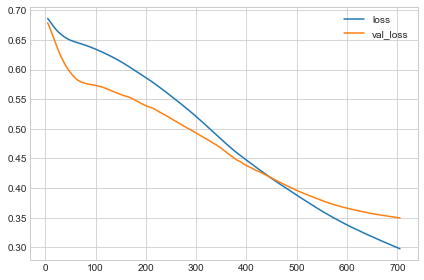

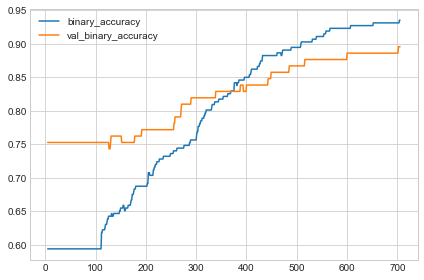

In [40]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(), 
              history_df['val_binary_accuracy'].max()))

Exercise: Binary Classification

**Farrukh Bulbulov**